# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 #In this study, a total of 249 unique mice were treated with various drug regimens, such as Capomulin, Ramicane, Propriva, Infubinol, etc., with primarily equal drugs amount for the mice. The gender distribution was relatively balanced, with 124 female mice and 125 male mice. A strong positive correlation (correlation coefficient: 0.84) was found between mouse weight and the average tumor volume in the Capomulin regimen, indicating that as mouse weight increases, average tumor volume also increases. The regression analysis showed that mouse weight can predict around 70% of the variability in average tumor volume, providing insights into the impact of mouse weight on tumor growth. Comparing treatments, both Capomulin and Ramicane demonstrated better results in reducing tumor size, suggesting their potential effectiveness in treating the condition compared to other regimens in the study. Overall, these findings contribute to a deeper understanding of the relationship between drug regimens, mouse weight, and tumor growth in the context of the selected treatments.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice_count = merged_df['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mice_count)

Number of unique mice IDs: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Checking for duplicate rows based on Mouse ID and Timepoint
duplicate_rows = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"].unique
duplicate_miceID


<bound method Series.unique of 909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object>

In [8]:
# Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_df.loc[merged_df.duplicated(subset=['Timepoint','Mouse ID'], keep =False), :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df['Mouse ID'] != 'g989', :]

# Verify the resulting clean DataFrame
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Check for duplicate Mouse IDs in the clean DataFrame
duplicate_mouse_ids = clean_df['Mouse ID'][clean_df.duplicated(subset='Mouse ID', keep=False)]

# Display the duplicate Mouse IDs (if any)
if not duplicate_mouse_ids.empty:
    print("Duplicate Mouse IDs in the clean DataFrame:")
    print(duplicate_mouse_ids)
else:
    print("No duplicate Mouse IDs found.")

# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

Duplicate Mouse IDs in the clean DataFrame:
0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1868, dtype: object


248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Group the data by drug regimen and calculate the desired statistics
grouped_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': grouped_stats['mean'],
    'Median': grouped_stats['median'],
    'Variance': grouped_stats['var'],
    'Standard Deviation': grouped_stats['std'],
    'SEM': grouped_stats['sem']
})

# Display the summary statistics table
print("Summary Statistics of Tumor Volume by Drug Regimen:")
print(summary_stats)


Summary Statistics of Tumor Volume by Drug Regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
# Using the aggregation method, produce the same summary statistics in a single line
# Display the summary statistics table
print("Summary Statistics of Tumor Volume by Drug Regimen:")
print(summary_stats)


Summary Statistics of Tumor Volume by Drug Regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

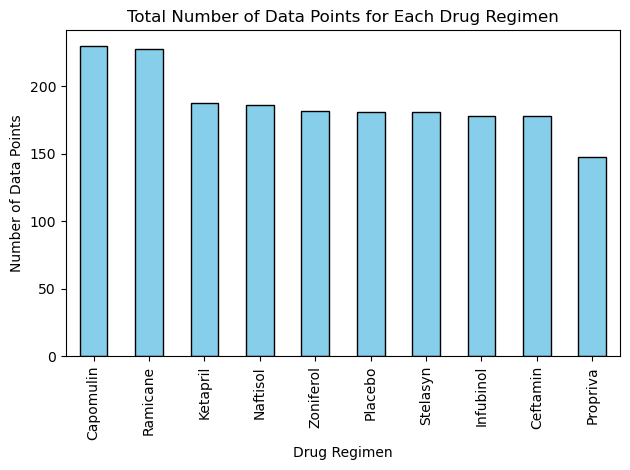

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Grouping the data by drug regimen and counting the number of rows (Mouse ID/Timepoints) for each regimen
drug_counts = clean_df['Drug Regimen'].value_counts()
# Creating the bar plot
drug_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Drug Regimen')
# Displaying the plot
plt.tight_layout()
plt.show()

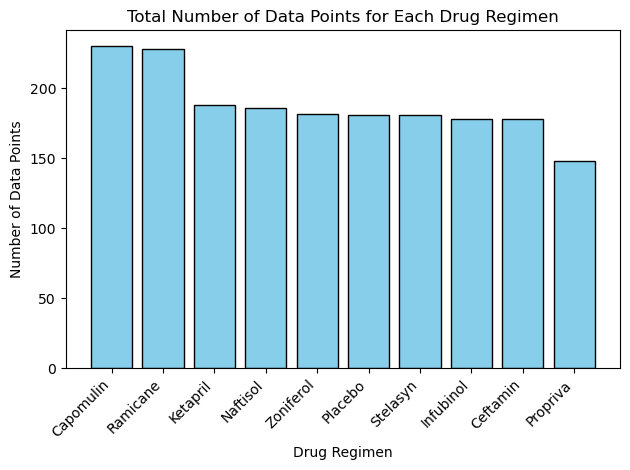

In [15]:

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df['Drug Regimen'].value_counts()

# Creating the bar plot using pyplot
plt.bar(drug_counts.index, drug_counts.values, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Drug Regimen')

# Rotating x-axis labels for better visibility (optional)
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

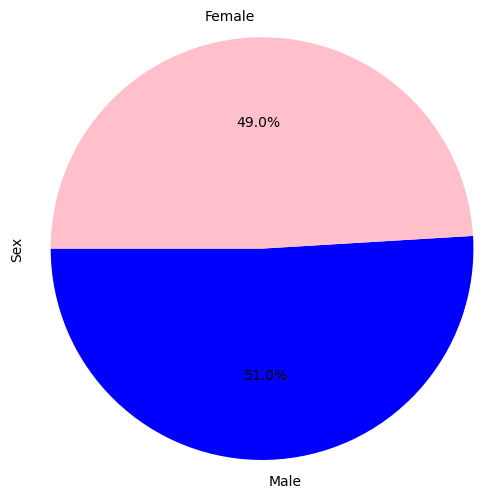

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the data and calculate the count of female and male mice
gender_counts = clean_df['Sex'].value_counts()

# Create a pie plot using Pandas plot.pie()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=180, figsize=(6, 6), colors=['blue', 'pink'])

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.tight_layout
plt.show()


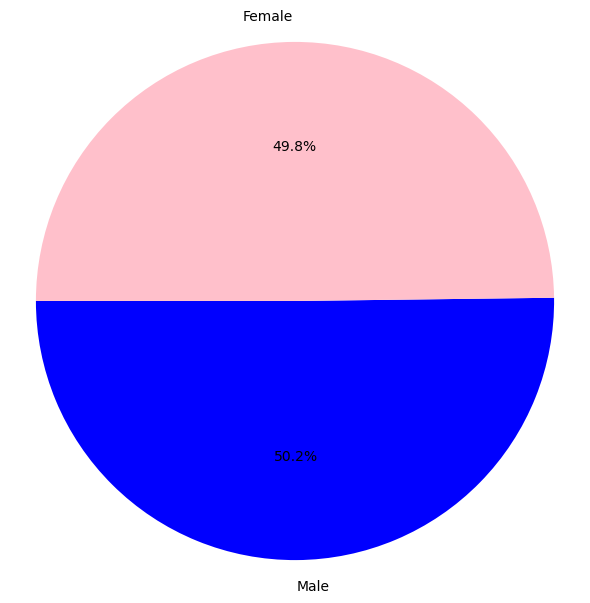

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Group the data and calculate the count of female and male mice
gender_counts = clean_df['Sex'].value_counts()

# Create a pie plot using pyplot.pie()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=180)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])

# Filter the DataFrame to include only the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol',
                                                                              'Ceftamin'])]

# Display the DataFrame with the final tumor volume for each mouse in the four treatments
df = four_treatments

In [45]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = four_treatments.loc[four_treatments['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Check if the tumor_vols list is not empty before calculating IQR
    if not tumor_vols.empty:
        # Calculate the IQR
        q1 = np.percentile(tumor_vols, 25)
        q3 = np.percentile(tumor_vols, 75)
        iqr = q3 - q1
        # Determine outliers using upper and lower bounds
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = tumor_vols.loc[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]
        
        # Print potential outliers for each treatment
        if outliers.empty:
            print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
        else:
            print(f"{treatment}'s potential outliers:\n{outliers}")
    else:
        print(f"No data points for {treatment}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


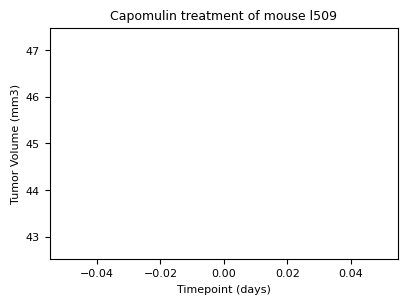

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_by_treatment, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o'))

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")]
Capomulin_df = clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")]
Capomulin_df.loc[clean_data["Mouse ID"]=="l509"]\
.plot.line(x="Timepoint", y="Tumor Volume (mm3)",figsize=(4.5,3),
           fontsize=8, legend=False)
plt.title("Capomulin treatment of mouse l509" ,fontsize=9)
plt.xlabel("Timepoint (days)", fontsize=8)
plt.ylabel("Tumor Volume (mm3)", fontsize=8)
plt.show()

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df_mean = Capomulin_df.groupby(["Mouse ID", "Age_months"], as_index=False).mean()
plt.figure(figsize=(4.5, 3))
plt.scatter(Capomulin_df_mean["Weight (g)"], Capomulin_df_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)", fontsize=8)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=8)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=9)
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = Capomulin_df_mean["Weight (g)"]
tumor_volume = Capomulin_df_mean["Tumor Volume (mm3)"]
correlation_coefficient = st.pearsonr(weight, tumor_volume)[0]
plt.figure(figsize=(6, 4))
plt.scatter(weight, tumor_volume)
plt.plot(weight, slope * weight + intercept, color='red', label='Linear Regression')
# Add labels and title
plt.xlabel("Weight (g)", fontsize=10)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=10)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=12)

# Add correlation coefficient and regression equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient, 2)}")
plt.legend()
plt.grid(True)
plt.show()